# MVP de Machine Learning & Analytics

### Aluno: Hygo Freire Tagarro

Este notebook contem o MVP da sprint (Machine Learning & Analytics) do curso de Pós-Graduação em Ciência de Dados e Analytics da PUC-RJ.

```
Neste projeto, vou trabalhar com um tipo simples de machine learning chamado regressão linear. Começarei carregando os dados necessários e preparando-os para uso. 
Depois, vou dividir esses dados em duas partes: uma para treinar o modelo e outra para testá-lo mais tarde. Durante a preparação, vou escolher as características 
mais importantes dos dados para ajudar a melhorar o desempenho do modelo. A seguir, vou construir o modelo usando a regressão linear e ajustar algumas configurações 
especiais, chamadas de hiperparâmetros, para fazer com que ele funcione melhor. Também usarei uma técnica chamada validação cruzada, que ajuda a garantir que meu modelo 
funcionará bem com novos dados, não apenas com os dados que usei para criá-lo. Por fim, vou avaliar como o modelo se saiu e comparar seus resultados para ver o quão bom ele é.
``` 

## 1. Informações sobre o notebook


Foi utilizado o dataset [Climate Change: Earth Surface Temperature Data](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data), de forma mais especifica foi usado o csv `GlobalLandTemperaturesByMajorCity.csv`

Este dataframe apresenta informaceos relacionadas a dados climáticos:
```
dt: Data em que as observações climáticas foram registradas, formatadas como YYYY-MM-DD.
AverageTemperature: Mostra a temperatura média registrada na localidade específica, expressa em graus Celsius.
AverageTemperatureUncertainty: Reflete a incerteza associada com a medição da temperatura média.
City: Indica a cidade onde a temperatura foi medida.
Country: Especifica o país onde a cidade se encontra'.
Latitude: Fornece a latitude do local de medição, expressa em graus ao norte (N) ou sul (S) do equador.
Longitude: Aponta a longitude do local de medição, mostrada em graus a leste (E) ou oeste (W) do Meridiano de Greenwich.
```

## 2. Definição do problema

O enfrentamento do aquecimento global é essencial para preservar a saúde do nosso planeta e a segurança das gerações futuras, visto que desde a revolução industrial as temperaturas vêm aumentando constantemente. Provavelmente o maior desafio ambiental do nosso tempo, o aquecimento global impacta diretamente a estabilidade climática, bem como a biodiversidade, os ecossistemas e as comunidades em todo o mundo. Torna-se, assim, um elemento crítico nas políticas ambientais em âmbitos local, regional e global. Pesquisas indicam que os investimentos em tecnologias sustentáveis e em medidas para reduzir as emissões de gases do efeito estufa oferecem retornos econômicos substanciais, pois os gastos com mitigação frequentemente custam menos do que os prejuízos causados por impactos ambientais e adaptações necessárias devido às mudanças climáticas. O desafio é entender a possível escala de aumento para os próximos anos.".

## 3. Carga dos dados

In [169]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Import para gerenciar os arquivos
import os.path
import requests
import shutil

# seaborn: statistical data visualization
import seaborn as sns

# Imports necessários
# Importando o r2_score para calcular o coeficiente de determinação R² de um modelo de regressão
from sklearn.metrics import r2_score

# Importando o mean_absolute_error para calcular o erro médio absoluto (MAE) 
from sklearn.metrics import mean_absolute_error

# Importando pandas para manipulação de dados
import pandas as pd

# Importando numpy para operações matemáticas e manipulação de arrays
import numpy as np

# Importando train_test_split para dividir os dados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split

# Importando modelos de regressão do Scikit-Learn
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Importando modelo de árvore de decisão para regressão
from sklearn.tree import DecisionTreeRegressor

# Importando modelo de Random Forest para regressão
from sklearn.ensemble import RandomForestRegressor

# Importando mean_squared_error para calcular o erro médio quadrático
from sklearn.metrics import mean_squared_error

# Importando sqrt para calcular a raiz quadrada
from math import sqrt

# Importando matplotlib.pyplot para criar visualizações gráficas
import matplotlib.pyplot as plt
import matplotlib as mpl

# Importando multiprocessing para pegar quantidade de nucleos na maquina
import multiprocessing

# Importando cross_val_score para realizar validação cruzada e KFold para criar os folds
from sklearn.model_selection import cross_val_score, KFold

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer



In [170]:
# Nome do arquivo resultante após a concatenação
file_path = 'dataset.csv.gz'

def download_csv():
    exists_file = os.path.isfile(file_path)
    if not exists_file:
        # Baixar o arquivo
        with open(file_path, 'wb') as resultado:
            url = "https://raw.githubusercontent.com/hygo2025/datasets/main/GlobalLandTemperaturesByMajorCity.csv.gz"
            # Baixar o arquivo
            response = requests.get(url, stream=True)
            # Copiar o conteúdo do arquivo dividido para o arquivo resultante
            shutil.copyfileobj(response.raw, resultado) 
        print("Arquivos divididos agrupados com sucesso!")

download_csv()

In [171]:

# Carga do dataset vai ser feita via arquivo baixado em partes acima
# Os labels foram incluidos na primeira linha do arquivo
df = pd.read_csv(file_path, delimiter=',')

# Exibe as linha iniciais
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


## 4. Análise de Dados dataset nao processados

In [172]:
# Mostra as dimensões do dataset
print(df.shape)

(239177, 7)


In [173]:
# Mostra as informações do dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB
None


In [174]:
# Mostra as 10 primeiras linhas do dataset
print(df.head(10))

           dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0  1849-01-01              26.704                          1.435  Abidjan   
1  1849-02-01              27.434                          1.362  Abidjan   
2  1849-03-01              28.101                          1.612  Abidjan   
3  1849-04-01              26.140                          1.387  Abidjan   
4  1849-05-01              25.427                          1.200  Abidjan   
5  1849-06-01              24.844                          1.402  Abidjan   
6  1849-07-01              24.058                          1.254  Abidjan   
7  1849-08-01              23.576                          1.265  Abidjan   
8  1849-09-01              23.662                          1.226  Abidjan   
9  1849-10-01              25.263                          1.175  Abidjan   

         Country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W  


In [175]:
# Mostra as 10 últimas linhas do dataset
df.tail(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
239167,2012-12-01,-0.822,0.451,Xian,China,34.56N,108.97E
239168,2013-01-01,-1.635,0.432,Xian,China,34.56N,108.97E
239169,2013-02-01,2.362,0.558,Xian,China,34.56N,108.97E
239170,2013-03-01,10.110,0.480,Xian,China,34.56N,108.97E
239171,2013-04-01,12.563,1.823,Xian,China,34.56N,108.97E
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E
239176,2013-09-01,NaN,NaN,Xian,China,34.56N,108.97E


In [176]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


## 5. Pré-processamento dos Dados

### 5.1. Filtrando dados invalidos

In [177]:
# Criando a coluna data no padrao datetime
df['data'] = pd.to_datetime(df['dt'])

# Criando a coluna ano
df['Year'] = df['data'].dt.year
df.sort_values(by='data')


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,data,Year
173008,1743-11-01,7.648,1.749,Paris,France,49.03N,2.45E,1743-11-01,1743
151957,1743-11-01,-1.854,1.734,Montreal,Canada,45.81N,72.69W,1743-11-01,1743
24500,1743-11-01,6.326,1.601,Berlin,Germany,52.24N,13.14E,1743-11-01,1743
138329,1743-11-01,6.652,2.015,Madrid,Spain,40.99N,4.26W,1743-11-01,1743
128607,1743-11-01,7.541,1.753,London,United Kingdom,52.24N,0.00W,1743-11-01,1743
...,...,...,...,...,...,...,...,...,...
72630,2013-09-01,NaN,NaN,Faisalabad,Pakistan,31.35N,73.51E,2013-09-01,2013
70259,2013-09-01,NaN,NaN,Durban,South Africa,29.74S,31.38E,2013-09-01,2013
68378,2013-09-01,NaN,NaN,Dhaka,Bangladesh,23.31N,90.00E,2013-09-01,2013
93493,2013-09-01,NaN,NaN,Istanbul,Turkey,40.99N,29.82E,2013-09-01,2013


In [178]:
# Converter dt para datetime e definir como índice
df['dt'] = pd.to_datetime(df['dt'])
df.set_index('dt', inplace=True)

print(df.shape)

(239177, 8)


In [179]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,data,Year
dt,,,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849-01-01,1849
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849-02-01,1849
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849-03-01,1849
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849-04-01,1849
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849-05-01,1849


In [180]:
# Tratar valores ausentes
df['AverageTemperature'] = df['AverageTemperature'].fillna(df['AverageTemperature'].mean())
df['AverageTemperatureUncertainty'] = df['AverageTemperatureUncertainty'].fillna(df['AverageTemperatureUncertainty'].mean())

df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,data,Year
dt,,,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849-01-01,1849
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849-02-01,1849
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849-03-01,1849
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849-04-01,1849
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849-05-01,1849


## 6. Análise de Dados dataset pre-processados

### 6.1. Media das temperaturas pelos anos

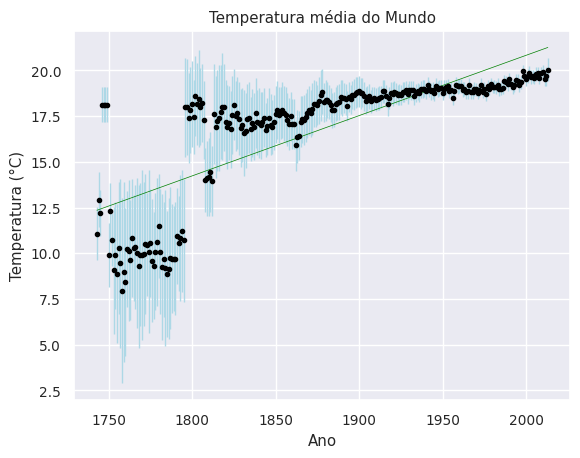

In [181]:
# Funcao para plotar o grafico de temperatura anual
def print_variation_by_year(local_df, title, min_temp=None, max_temp=None):
    # Calcula a media por ano
    df_mean_by_year = local_df.groupby(local_df.data.dt.year).mean(numeric_only=True)
    # Extrai as temperaturas do dataset
    temperatures = list(df_mean_by_year.AverageTemperature)
    # Preparando os dados para treinamento de um modelo de regressão linear de ridge
    years = list(df_mean_by_year.index)
    
    x_train = []
    y_train = temperatures
    for y in years:
        x_train.append([y])
    
    #Criando o objeto de regressao de ridge, usando parametro alpha igual a 1, quanto maior o valor de alpha, mais forte é a penalização
    reg = Ridge(alpha=1)
    
    # Treinando o modelo
    reg.fit(x_train, y_train)
    prediction = reg.predict(x_train)
    
    # Plotando os dados
    # plt.figure(figsize=(10, 6))  # Define o tamanho da figura
    plt.xlabel('Ano')
    plt.title("Temperatura média do " + title)
    plt.ylabel('Temperatura (°C)')
    
    # Plotando a média com barras de erro (desvio padrão)
    plt.errorbar(df_mean_by_year.index, df_mean_by_year.AverageTemperature, yerr=df_mean_by_year.AverageTemperatureUncertainty, fmt='.', color='black', ecolor='lightblue', elinewidth=1)
    
    # Plotando a linha de regressão
    plt.plot(x_train, prediction, color='green', linewidth='0.5')
    
    if min_temp is not None and max_temp is not None:
        plt.axhline(min_temp, color='red', linestyle='--', label=str(min_temp))
        plt.axhline(max_temp, color='blue', linestyle='--', label=str(max_temp))
        plt.legend()
    
    plt.show()


print_variation_by_year(df, 'Mundo')


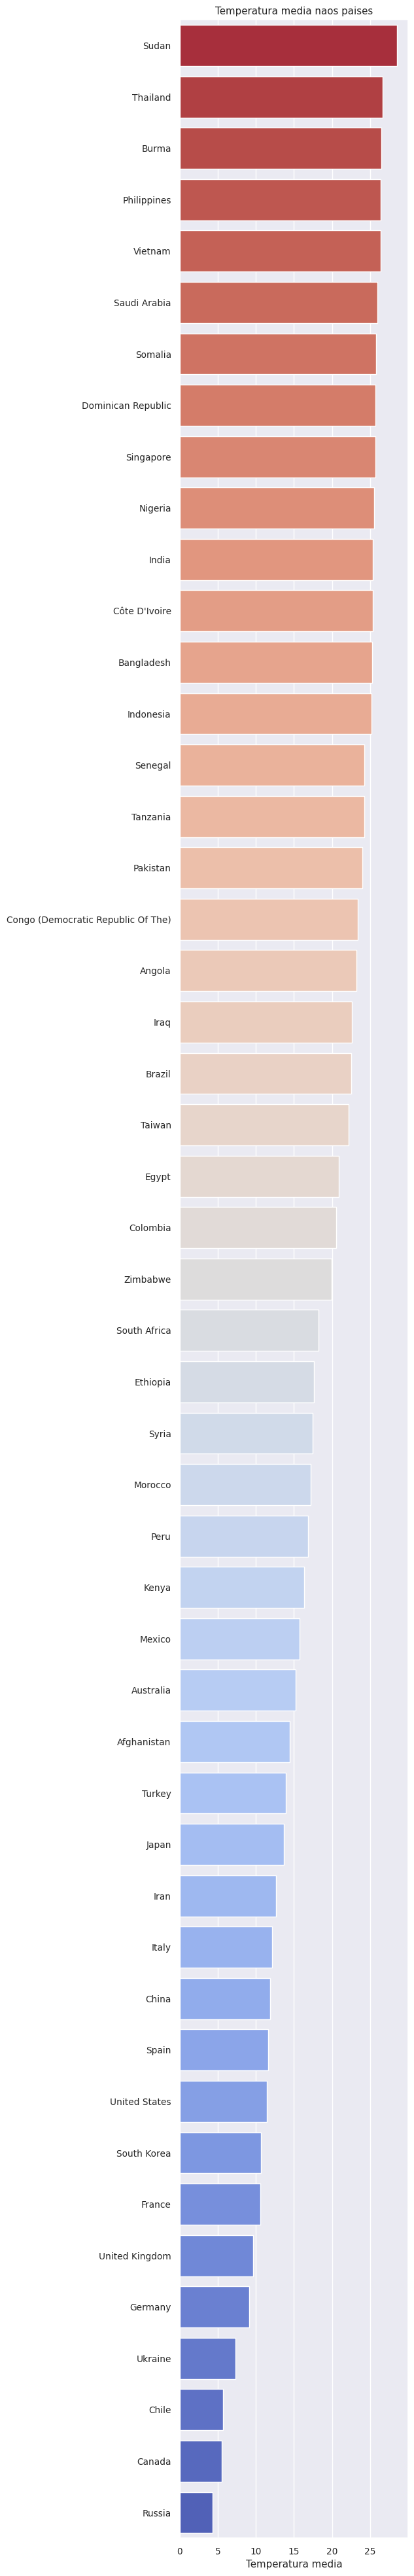

In [182]:
countries = np.unique(df['Country'])
mean_temp = []

for country in countries:
    mean_temp.append(df[df['Country'] == country]['AverageTemperature'].mean())

# Essa função combina os dois arrays, em uma lista de tuplas, com cada tupla ficando com uma cidade e uma temperatura
tuplas = zip(mean_temp, countries)

# Ordernando as tuplas da temperatura mais quente para a mais fria
sorted_tuplas = sorted(tuplas, reverse=True)

# Essa operacao faz o contrario da zip linha 8
ziped_tuplas = zip(*sorted_tuplas)

#  Converte cada tupla em uma lista
mean_temp_bar, cities_bar = map(list, ziped_tuplas)

sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(x=mean_temp_bar, y=cities_bar, palette = colors_cw[::-1])
Text = ax.set(xlabel='Temperatura media', title='Temperatura media naos paises')

### 6.2 Paises que mais aumentaram a temperatura

In [183]:
# Remover possíveis outliers na coluna 'AverageTemperature'
Q1 = df['AverageTemperature'].quantile(0.25)
Q3 = df['AverageTemperature'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['AverageTemperature'] >= lower_bound) & (df['AverageTemperature'] <= upper_bound)]

# Função para obter a data correspondente à temperatura mínima e máxima
def get_min_max_dates(group):
    min_temp_date = group.loc[group['AverageTemperature'].idxmin(), 'data']
    max_temp_date = group.loc[group['AverageTemperature'].idxmax(), 'data']
    return pd.Series({'MinDate': min_temp_date, 'MaxDate': max_temp_date})

# Agrupar por país e calcular as informações, incluindo as datas correspondentes
country_stats = df_cleaned.groupby('Country').agg(
    min_temp=('AverageTemperature', 'min'),
    max_temp=('AverageTemperature', 'max'),
    mean_temp=('AverageTemperature', 'mean')
).reset_index()
min_max_dates = df_cleaned.groupby('Country').apply(get_min_max_dates).reset_index()

# Mesclar os DataFrames de estatísticas e datas correspondentes
warmest_countries = pd.merge(country_stats, min_max_dates, on='Country', suffixes=('_stats', '_dates'))

# Renomear as colunas
warmest_countries.columns = ['Country', 'MinTemperature', 'MaxTemperature', 'MeanTemperature',
                        'MinDate', 'MaxDate']



In [184]:
# Pais que mais aumentou a temperatura
country_that_increased_most = warmest_countries.iloc[0]['Country']

# Pais que menos aumentou a temperatura
country_that_decreased_most = warmest_countries.iloc[warmest_countries.shape[0] - 1]['Country']

print(country_that_increased_most)
print(country_that_decreased_most)

Afghanistan
Zimbabwe


In [185]:
# Funcao que recebe um dataframe com todos os dados, um dataframe com os dados dos paises que mais tiveram alteracao de temperatura, e o nome do pais
def print_variation_by_country_year(global_df, warmest_df, country, show_min_max = False):
    df_increased_most = global_df.loc[global_df['Country'] == country]
    df_by_country = warmest_df.loc[warmest_df['Country'] == country]
    min_temp = None if not show_min_max else df_by_country.iloc[0]['MinTemperature'] 
    max_temp = None if not show_min_max else df_by_country.iloc[0]['MaxTemperature']
    print_variation_by_year(df_increased_most, country, min_temp, max_temp)

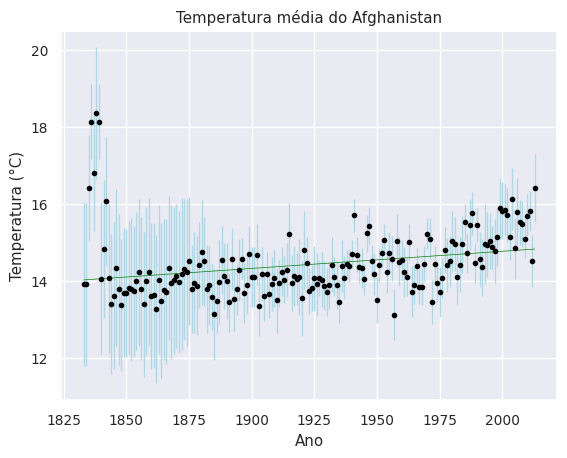

In [186]:
# Plotando pais com maior diferenca de temperatura
print_variation_by_country_year(df, warmest_countries, country_that_increased_most)

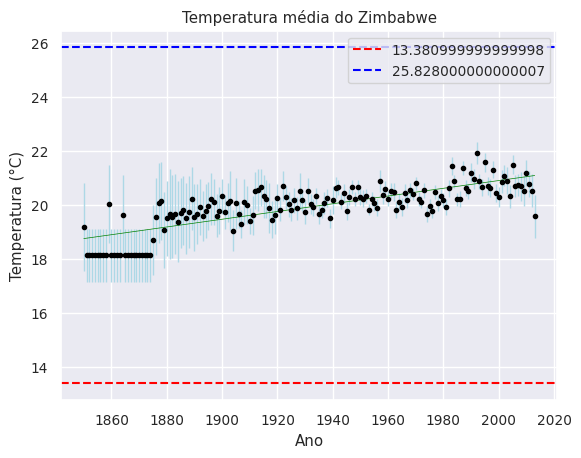

In [187]:
# Plotando pais com menor diferenca de temperatura
print_variation_by_country_year(df, warmest_countries, country_that_decreased_most, True)

## 7. Feature selection

In [188]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,data,Year
dt,,,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849-01-01,1849
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849-02-01,1849
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849-03-01,1849
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849-04-01,1849
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849-05-01,1849


In [189]:

# Convertendo data para formato numérico (número de meses desde a primeira data registrada)
df['days_since_start'] = (df['data'] - df['data'].min()).dt.days  # converter data para dias

# Codificação de variáveis categóricas
label_encoder = LabelEncoder()
df['City_encoded'] = label_encoder.fit_transform(df['City'])
df['Country_encoded'] = label_encoder.fit_transform(df['Country'])
df['Latitude_encoded'] = label_encoder.fit_transform(df['Latitude'])
df['Longitude_encoded'] = label_encoder.fit_transform(df['Longitude'])
 
# Preparando as variáveis para o SelectKBest
fields = ['Latitude_encoded', 'Longitude_encoded', 'AverageTemperatureUncertainty', 'City_encoded', 'Country_encoded']
X = df[fields]
y = df['AverageTemperature']

# Tratamento de possíveis valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = y.fillna(y.mean())

# Aplicação de SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')
fit = selector.fit(X_imputed, y_imputed)
X_selected = selector.transform(X_imputed)

features = pd.DataFrame({'Feature': fields, 'Scores': fit.scores_}).nlargest(7, 'Scores')
features


,Feature,Scores
0,Latitude_encoded,61580.868823
1,Longitude_encoded,16660.228062
2,AverageTemperatureUncertainty,9901.376710
3,City_encoded,5691.749733
4,Country_encoded,86.327013


## 8. Modelo que para prever temperaturas no futuro

### 7.1 Regressao linear usando feature selection

In [190]:
# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_imputed, test_size=0.3, random_state=42)

# Modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)


# Preparando dados para o futuro
latest_year = df['data'].dt.year.max()
future_years = [latest_year + x for x in range(1, 101)]
future_days = [(x - df['data'].dt.year.min()) * 365 for x in future_years]  # Assume each year as 365 days

# Configurando DataFrame futuro
future_df = pd.DataFrame({
    'days_since_start': future_days,
    'City_encoded': df['City_encoded'].mode()[0],
    'Country_encoded': df['Country_encoded'].mode()[0],
    'Latitude_encoded': df['Latitude_encoded'].mode()[0],
    'Longitude_encoded': df['Longitude_encoded'].mode()[0],
    'AverageTemperatureUncertainty': df['AverageTemperatureUncertainty'].mean()
})

# Selecionando as mesmas características que foram usadas para treinar o modelo
future_X = imputer.transform(future_df[fields])  # Assegura consistência

# Usando o modelo para fazer previsões
future_temperatures = model.predict(future_X)

# Adicionando as previsões ao DataFrame
future_df['PredictedTemperature'] = future_temperatures


# Criando um dicionário de mapeamento a partir do primeiro dataframe
country_mapping = df.set_index('Country_encoded')['Country'].to_dict()

# Ordenando o dicionário pelo Country_encoded
sorted_country_mapping = dict(sorted(country_mapping.items()))



# Aplicando o mapeamento ao segundo dataframe
future_df['Country'] = future_df['Country_encoded'].map(sorted_country_mapping)


In [191]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared score:", r2)


Mean Squared Error: 71.51763899537305
Root Mean Squared Error: 8.456810213985712
Mean Absolute Error: 6.661938031766437
R-squared score: 0.25445791161935927


## 7.2. Regresso linear utilizando os dados de Ano e Media de temperatura

In [192]:
# Dividindo o dataframe
X = df[['Year']]
y = df['AverageTemperature']

# Tamanho do conjunto de testes
test_size = 0.2

# Semente aleatoria
seed = 25

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Último ano no conjunto de dados
last_year = df['Year'].max()

# Previsões para os próximos 500 anos
future_years = pd.DataFrame({'Year': range(last_year + 1, last_year + 501)})
predicted_temperatures = model.predict(future_years[['Year']])


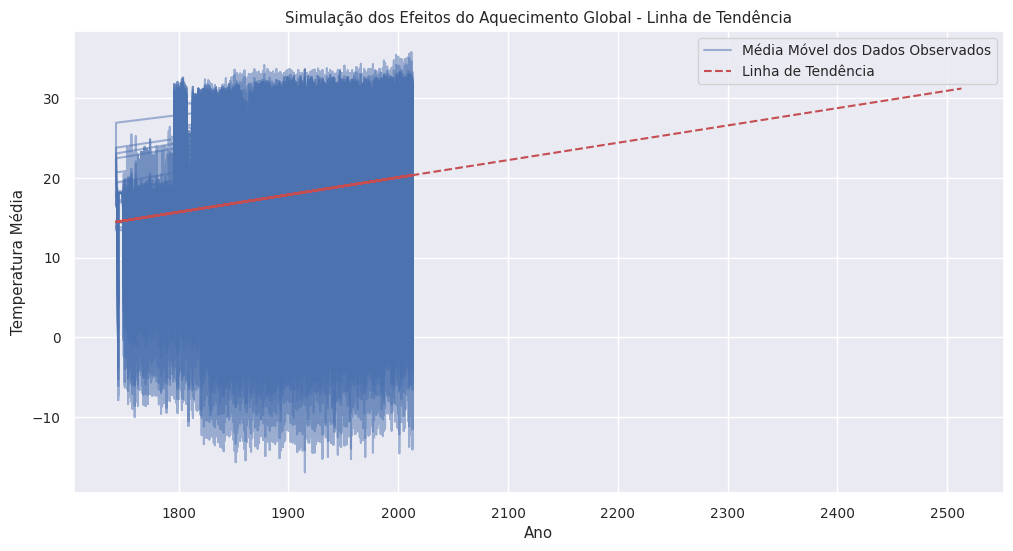

In [193]:
# Configurar o parâmetro para evitar o erro de limite
mpl.rcParams['agg.path.chunksize'] = 10000

# Último ano no conjunto de dados
last_year = df['Year'].max()

# Dados observados e média móvel
df['MovingAverage'] = df['AverageTemperature'].rolling(window=5).mean()

# Previsões para os próximos 500 anos
future_years = pd.DataFrame({'Year': range(last_year + 1, last_year + 501)})
predicted_temperatures = model.predict(future_years[['Year']])

# Combinar dados observados, previsões e média móvel em um único dataframe
combined_data = pd.concat([df, future_years])
combined_data['Predicted'] = model.predict(combined_data[['Year']])

# Plotando os resultados
plt.figure(figsize=(12, 6))

# Plotagem da média móvel para dados observados
plt.plot(combined_data['Year'], combined_data['MovingAverage'], 'b-', alpha=0.5, label='Média Móvel dos Dados Observados')

# Plotagem da linha de tendência para todos os dados (observados e previstos)
plt.plot(combined_data['Year'], combined_data['Predicted'], 'r--', label='Linha de Tendência')


plt.xlabel('Ano')
plt.ylabel('Temperatura Média')
plt.title('Simulação dos Efeitos do Aquecimento Global - Linha de Tendência')
plt.legend()
plt.grid(True)
plt.show()

### 7.2 Verificando acuracia do modelo

In [194]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared score:", r2)

Mean Squared Error: 94.22555945106173
Root Mean Squared Error: 9.706985085548537
Mean Absolute Error: 7.629775621937006
R-squared score: 0.019695156566143734


## 7.3. Comparando com mais modelos

Linear Regression: MSE médio = -93.92, desvio padrão = 1.18
Ridge Regression: MSE médio = -93.92, desvio padrão = 1.18
Lasso Regression: MSE médio = -93.92, desvio padrão = 1.18
Decision Tree: MSE médio = -92.64, desvio padrão = 1.13
Random Forest: MSE médio = -92.64, desvio padrão = 1.13


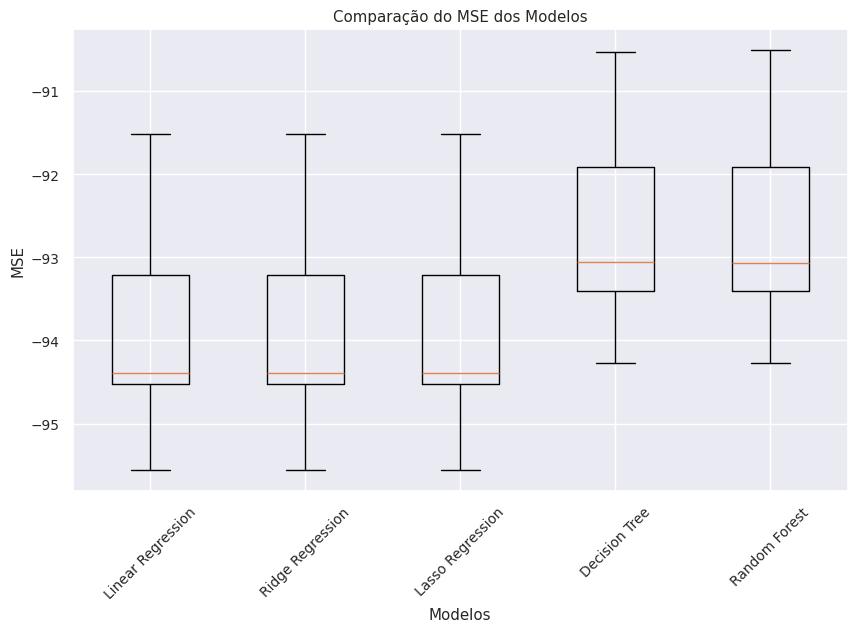

In [195]:
# Dividir o DataFrame em X e y
X = df[['Year']]
y = df['AverageTemperature']

# Tamanho do conjunto de testes
test_size = 0.2

# Semente aleatória
seed = 25

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Modelos a serem avaliados
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, n_jobs=multiprocessing.cpu_count())
}


# Definindo o número de folds para a validação cruzada
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

# Listas para armazenar os resultados dos modelos e seus nomes
results = []
names = []

# Avaliando um modelo por vez
for name, model in models.items():
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: MSE médio = {cv_results.mean():.2f}, desvio padrão = {cv_results.std():.2f}"
    print(msg)

# Boxplot de comparação dos modelos
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names)
plt.title('Comparação do MSE dos Modelos')
plt.ylabel('MSE')
plt.xlabel('Modelos')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## 8.0 Resultado

O modelo criado por esse trabalho tem um desempenho baixo para previsao de temperaturas, temos sim uma tendencia de aumento de temperatura mas esse modelo nao e feliz em classifica-lo

Nosso melhor resultado e:

```
Mean Squared Error: 71.51763899537305
Root Mean Squared Error: 8.456810213985712
Mean Absolute Error: 6.661938031766437
R-squared score: 0.25445791161935927
```

Que para outros modelos pode ser algo aceitavel mas como a mudanca de temperatura e gradativa um um desvio de cerca de 6.66 a 8.46 graus e alto demais

Para melhorarmos a previsao do modelo podemos utilizar um conjunto de dados mais amplos, tambem sendo possivel utilizar outros metodos que nao o aplicado nesse trabalho, tais como modelos de regressao nao linear ou algortimos de machine learning